**Задание 1**

In [ ]:
from math import sqrt

def manhattan(a, b):
 return sum ( abs (val1-val2) for val1, val2 in zip (a,b))

A = [1, 5]
B = [10, 15]

manhattan(A, B)

19

 Код решения задачи бинарной классификации на основе классификатора KNN

In [ ]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random_seed = 4238
np.random.seed(random_seed)

X, y = load_breast_cancer(return_X_y=True)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

clf = KNeighborsClassifier(n_neighbors=8, p=1)
clf.fit(X_train, y_train)

predictions = clf.predict(x_test)
acc = accuracy_score(y_test, predictions)

print(acc)

0.9766081871345029


Часть кода для выбора оптимального гиперпараметра K для решения задачи бинарной классификации на основе датасета breast cancer

In [ ]:
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean
random_seed = 4238

np.random.seed(random_seed)
n_splits = 3

from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

cv_scores = [0]*50
for k in range(1,51):
  clf = KNeighborsClassifier(n_neighbors=k, p=2)
  score = cross_val_score(clf, X, y, cv=n_splits)
  cv_scores[k-1] = mean(score)

print(np.argmax(cv_scores)+1)

11


Алгоритм KNN для объектов произвольных пространств для решения задачи многоклассовой классификации

In [ ]:
import numpy as np

class KNN_classifier:
  def __init__(self, n_neighbors: int, **kwargs):
    self.K = n_neighbors
    self.trainX = []
    self.trainY = []

  def fit(self, x: np.array, y: np.array):
    self.trainX = x
    self.trainY = y

  def predict(self, x: np.array):
    def dist(a: np.array ,b: np.array):
      d = a - b
      r = np.linalg.norm(d)
      return r
    a = self.trainY[np.argmax(self.trainY)]+1
    mass = [0]*a
    predictions = []
    test = []
    for testPoint in x:
      test.clear()
      for i in range(self.trainX.shape[0]):
        test.append(dist(testPoint, self.trainX[i]))

      testDist = np.array(test)
      for i in range(len(test)-1):
        for k in range(len(test)-i-1):
          if testDist[k] > testDist[k+1]:
            testDist[k], testDist[k+1] = testDist[k+1], testDist[k]
            self.trainY[k], self.trainY[k+1] = self.trainY[k+1], self.trainY[k]
            for o in range(self.trainX.shape[1]):
              self.trainX[k][o], self.trainX[k+1][o] = self.trainX[k+1][o], self.trainX[k][o]

      for j in range(a):
        for i in range(self.K):
          if self.trainY[i] == j:
            mass[j] = mass[j]+1

      predictions.append(np.argmax(mass))
      for j in range(a):
            mass[j] = 0
    predictions = np.array(predictions)
    return predictions

X = np.array([[ 0.56510722,  0.68599596, -0.92388505, -0.29546048, -0.12437532],
       [-0.79617537,  0.98406791,  1.19542652, -0.05626863, -0.69868076],
       [ 0.9629688 , -1.00423925, -0.53842833, -0.23744358,  0.83226685],
       [ 0.24671269, -0.41624448,  0.81679337,  1.59227446,  0.16192583],
       [-0.36972363,  0.17425997,  1.33668078,  1.16687907,  0.31709134],
       [-1.30482844, -0.05354323, -0.88862186, -1.121785  , -0.78442809],
       [-0.53975018,  0.90074877, -1.09317408,  1.52989481, -0.43375015],
       [-0.64709803, -0.09775791,  1.3506503 , -1.46957788,  1.63325543],
       [-0.73858464, -0.60678229,  0.31420272, -0.43100129, -0.37665876],
       [-0.29208809, -0.68795722,  0.06586655,  0.9583851 ,  1.70640775]])

y = np.array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

knn = KNN_classifier(n_neighbors=3)

knn.fit(X, y)

x_test = np.array([[-0.12489725,  0.65791923, -0.73112495,  1.42660225,  1.64728976],
       [ 0.01913388, -1.11351208, -0.63244098, -0.98121107,  0.38060892],
       [-0.92074931,  1.39812225,  0.39692147,  0.7717827 ,  0.44604002]])

knn.predict(x_test)

array([1, 0, 0])

In [ ]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = np.array([[ 0.56510722,  0.68599596, -0.92388505, -0.29546048, -0.12437532],
       [-0.79617537,  0.98406791,  1.19542652, -0.05626863, -0.69868076],
       [ 0.9629688 , -1.00423925, -0.53842833, -0.23744358,  0.83226685],
       [ 0.24671269, -0.41624448,  0.81679337,  1.59227446,  0.16192583],
       [-0.36972363,  0.17425997,  1.33668078,  1.16687907,  0.31709134],
       [-1.30482844, -0.05354323, -0.88862186, -1.121785  , -0.78442809],
       [-0.53975018,  0.90074877, -1.09317408,  1.52989481, -0.43375015],
       [-0.64709803, -0.09775791,  1.3506503 , -1.46957788,  1.63325543],
       [-0.73858464, -0.60678229,  0.31420272, -0.43100129, -0.37665876],
       [-0.29208809, -0.68795722,  0.06586655,  0.9583851 ,  1.70640775]])

y = np.array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X, y)

x_test = np.array([[-0.12489725,  0.65791923, -0.73112495,  1.42660225,  1.64728976],
       [ 0.01913388, -1.11351208, -0.63244098, -0.98121107,  0.38060892],
       [-0.92074931,  1.39812225,  0.39692147,  0.7717827 ,  0.44604002]])

predictions = clf.predict(x_test)
print(predictions)

[1 0 0]


**Задание 2**

Производные функции H по параметрам модели ω0...ωn

In [ ]:
import numpy as np

def sig(x):
 return 1/(1 + np.exp(-x))

def H(p, y):
  return -(y*np.log(p)+(1-y)*np.log(1-p))

def dH(xi, p, y):
  return xi*((1-y)*p-y*(1-p))

n = 3
y = 1
x = np.array([0]*n)
x[0] = 1
sum = 0
w = np.array([0]*n)
w[0] = 0
w[1] = 2
w[2] = -1
for i in range(1, n):
  x[i] = i
  sum = sum+w[i]*x[i]
p = sig(sum)
result = 1
for i in range(n):
  result = result*dH(x[i], p, y)
print(result)

-0.25


Классический алгоритм градиентного спуска для обучения модели логистической регрессии

In [ ]:
import numpy as np

np.random.seed(42)

def sig(x):
 return 1/(1 + np.exp(-x))

def dH(xi, p, y):
  return xi*((1-y)*p-y*(1-p))

def gradient(y_true: int, y_pred: float, x: np.array) -> np.array:
  n = len(x)
  grad = [0]*(n+1)
  for i in range(0, n):
    k = dH(x[i], y_pred, y_true)
    grad[i] = k
  grad[n] = dH(1, y_pred, y_true)
  return grad

def update(alpha: np.array, gradient: np.array, lr: float):
  alpha_new = alpha-lr*gradient
  return alpha_new

def train(alpha0: np.array, x_train: np.array, y_train: np.array, lr: float, num_epoch: int):
  alpha = alpha0.copy()
  for epo in range(num_epoch):
    for i,x in enumerate(x_train):
      n = len(x)
      sum = 0
      for j in range(0, n):
        sum = sum+alpha[j]*x[j]
      sum = sum+alpha[n]
      p = sig(sum)
      grad = np.array(gradient(y_train[i], p, x))
      alpha = update(alpha, grad, lr)
  return alpha




X = np.array([[ 0.56510722,  0.68599596, -0.92388505, -0.29546048, -0.12437532],
       [-0.79617537,  0.98406791,  1.19542652, -0.05626863, -0.69868076],
       [ 0.9629688 , -1.00423925, -0.53842833, -0.23744358,  0.83226685],
       [ 0.24671269, -0.41624448,  0.81679337,  1.59227446,  0.16192583],
       [-0.36972363,  0.17425997,  1.33668078,  1.16687907,  0.31709134],
       [-1.30482844, -0.05354323, -0.88862186, -1.121785  , -0.78442809],
       [-0.53975018,  0.90074877, -1.09317408,  1.52989481, -0.43375015],
       [-0.64709803, -0.09775791,  1.3506503 , -1.46957788,  1.63325543],
       [-0.73858464, -0.60678229,  0.31420272, -0.43100129, -0.37665876],
       [-0.29208809, -0.68795722,  0.06586655,  0.9583851 ,  1.70640775]])

y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

alpha0 = np.random.randn(6)

print(train(alpha0, X, y, 0.00001, 5))

[ 0.49675594 -0.13826107  0.64756566  1.52292394 -0.2342032  -0.23413027]


**Задание 3**

Алгоритм линейной регрессии

In [ ]:
import numpy as np
np.random.seed(42)

class LinearRegression:
    def __init__(self, **kwargs):
      self.coef_ = None

    def fit(self, x: np.array, y: np.array):
      if len(x.shape) == 2:
        n = x.shape[0]
        m = x.shape[1]
      else:
        n = x.shape[0]
        m = 1
      e = [1]*n
      if len(x.shape) == 2:
        x = np.insert(x, m, e, axis=1)
      else:
        x = np.column_stack((x,e))
      xt = np.transpose(x)
      xu0 = np.dot(xt,x)
      xo = np.linalg.inv(xu0)
      xu1 = np.dot(xo,xt)
      self.coef_ = np.dot(xu1,y)

    def predict(self, x: np.array):
      if len(x.shape) == 2:
        n = x.shape[0]
        m = x.shape[1]
      else:
        n = x.shape[0]
        m = 1
      e = [1]*n
      if len(x.shape) == 2:
        x = np.insert(x, m, e, axis=1)
      else:
        x = np.column_stack((x,e))
      return np.dot(x,self.coef_)

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
print(X[:5])

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

predictions = LinReg.predict(x_test)
predictions

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

R-квадрат

In [ ]:
import numpy as np

def r2(y_true, y_pred):
  e = 0
  de = 0
  dy = 0
  n = len(y_true)
  for i in range(n):
    e = e+y_true[i]
  e = e/n
  for i in range(n):
    de = de+np.power((y_pred[i]-y_true[i]),2)
    dy = dy+np.power((y_true[i]-e),2)
  return 1-de/dy

a = r2(y_test, predictions)
print(a)

from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.47728971643225837


0.4772897164322587

Оценка выборки

In [ ]:
import numpy as np

filename = '5.npy'
a = np.load(filename)
a = np.transpose(a)
x = a[0]
y = a[1]

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

predictions = LinReg.predict(x_test)
predictions

a = r2(y_test, predictions)
print(a)

0.8307366611313196


**Задание 4**

Реализации обучения решающего дерева из библиотеки sklearn с определёнными параметрами

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from math import floor

from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state = 42)
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

clf.fit(X_train, y_train)
preds = clf.predict(x_test)

acc = accuracy_score(preds, y_test)

print(acc)
print(round(acc))
print(floor(acc))

0.9833333333333333
1
0


Обучить стандартный регрессор на основе решающего дерева решать задачу предсказания стоимости бриллианта по набору его признаков

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

np.random.seed(42)

a = pd.read_csv('TRAIN.csv')
a = a.drop('Unnamed: 0', axis = 1)
print(a)
a = np.array(a)

values_of_seq = a[0:,1]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values_of_seq)
a[0:,1] = integer_encoded

values_of_seq = a[0:,2]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values_of_seq)
a[0:,2] = integer_encoded

values_of_seq = a[0:,3]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values_of_seq)
a[0:,3] = integer_encoded

a = shuffle(a, random_state=42)

X = a[0:,[0,1,2,3,4,5,7,8,9]]
y = a[0:,6].astype('int')

clf = DecisionTreeRegressor(criterion="squared_error", max_depth=12, random_state=42)
print(cross_validate(clf, X, y, cv=10, scoring=('r2'), return_train_score=True))

clf = DecisionTreeRegressor(criterion="friedman_mse", max_depth=16, random_state=42)
print(cross_validate(clf, X, y, cv=10, scoring=('r2'), return_train_score=True))

clf = DecisionTreeRegressor(criterion="poisson", max_depth=22, random_state=42)
print(cross_validate(clf, X, y, cv=10, scoring=('r2'), return_train_score=True))

clf = DecisionTreeRegressor(criterion="squared_error", max_depth=45, random_state=42)
print(cross_validate(clf, X, y, cv=10, scoring=('r2'), return_train_score=True))

clf = DecisionTreeRegressor(criterion="friedman_mse", max_depth=95, random_state=42)
print(cross_validate(clf, X, y, cv=10, scoring=('r2'), return_train_score=True))

clf = DecisionTreeRegressor(criterion="poisson", max_depth=33, random_state=42)
print(cross_validate(clf, X, y, cv=10, scoring=('r2'), return_train_score=True))

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]
{'fit_time': array([0.23492908, 0.23555255, 0.219

**Задание 5**

Алгоритм формирования выборки для случайного леса (bootstrap aggregating + метод случайных подпространств)

In [ ]:
import numpy as np
np.random.seed(42)

class sample(object):
  def __init__(self, X, n_subspace):
    self.idx_subspace = self.random_subspace(X, n_subspace)

  def __call__(self, X, y):
    idx_obj = self.bootstrap_sample(X)
    X_sampled, y_sampled = self.get_subsample(X, y, self.idx_subspace, idx_obj)
    return X_sampled, y_sampled

  @staticmethod
  def bootstrap_sample(X, random_state=42):
    ind = []
    n = X.shape[0]
    for i in range(n):
      ind.append(i)
    ind = np.array(ind)
    ind = np.random.choice(ind, n)
    ind = np.unique(ind)
    ind = np.sort(ind)
    return ind

  @staticmethod
  def random_subspace(X, n_subspace, random_state=42):
    ind = []
    m = X.shape[1]
    for i in range(m):
      ind.append(i)
    ind = np.array(ind)
    ind = np.random.choice(ind, n_subspace, replace = False)
    ind = np.sort(ind)
    return ind

  @staticmethod
  def get_subsample(X, y, idx_subspace, idx_obj):
    x_sampled = [0]*len(idx_obj)
    for i in range(len(idx_obj)):
      x_sampled[i] = [0]*len(idx_subspace)
    y_sampled = []
    n = 0
    m = 0
    for i in idx_obj:
      y_sampled.append(y[i])
      for j in idx_subspace:
        x_sampled[n][m] = X[i][j]
        m = m+1
      m = 0
      n = n+1
    x_sampled = np.array(x_sampled)
    y_sampled = np.array(y_sampled)
    return [x_sampled, y_sampled]

X = np.array([[1,2,3], [4,5,6], [7,8,9]])
Y = np.array([1, 2, 3])
s = sample(X, 2)

bootstrap_indices = s.bootstrap_sample(X)
X_sampled, y_sampled = s.get_subsample(X, Y, s.idx_subspace, bootstrap_indices)

print(bootstrap_indices)
print(s.idx_subspace)
print(X_sampled)
print(y_sampled)

[0 2]
[0 1]
[[1 2]
 [7 8]]
[1 3]


Алгоритм случайного леса на основе решающих деревьев

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

N_ESTIMATORS = 1
MAX_DEPTH = 2
SUBSPACE_DIM = 2

class random_forest(object):
  def __init__(self, n_estimators: int, max_depth: int, subspaces_dim: int, random_state: int):
    self.n_estimators = n_estimators
    self.max_depth = max_depth
    self.subspaces_dim = subspaces_dim
    self.random_state = random_state
    self._estimators = None
    self.subspace_idx = None

  def fit(self, X, y):
    s = sample(X, self.subspaces_dim)
    bootstrap_indices = s.bootstrap_sample(X)
    X_train, y_train = s.get_subsample(X, y, s.idx_subspace, bootstrap_indices)
    tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state = self.random_state).fit(X_train, y_train)
    self._estimators = [tree]*self.n_estimators
    self.subspace_idx = [s.idx_subspace]*self.n_estimators
    for i in range(self.n_estimators):
      s = sample(X, self.subspaces_dim)
      bootstrap_indices = s.bootstrap_sample(X)
      X_train, y_train = s.get_subsample(X, y, s.idx_subspace, bootstrap_indices)
      self.subspace_idx[i] = s.idx_subspace
      tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state = self.random_state).fit(X_train, y_train)
      self._estimators[i] = tree

  def predict(self, X):
    preds = [0]*(X.shape[0])
    for i0 in range(self.n_estimators):
      x_test = [0.]*(X.shape[0])
      for i in range(X.shape[0]):
        x_test[i] = [0.]*(len(self.subspace_idx[0]))
      x_test = np.array(x_test)
      n = 0
      m = 0
      k = 0
      for i in range(X.shape[0]):
        for j in self.subspace_idx[i0]:
          x_test[n][m] = X[i][j]
          m = m+1
        m = 0
        n = n+1
      k = 0
      x_test = np.array(x_test)
      preds_tree = self._estimators[i0].predict(x_test)
      for i in range(len(preds_tree)):
        preds_tree[i] = preds_tree[i]-1
      for i in range(len(preds)):
        for j in range(X.shape[0]):
          if i == j:
            preds[i] = preds[i]+preds_tree[k]
            k = k+1

    for i in range(len(preds)):
      o = 100000
      if preds[i] == 0:
        preds[i] = 1
        o = 0
      if np.sign(preds[i]) < 0 and o != 0:
        preds[i] = 0
      if np.sign(preds[i]) > 0 and o != 0:
        preds[i] = 2
    return preds

iris = load_iris()
X, y = iris.data, iris.target

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

rf = random_forest(1, 2, 2, 42)
rf.fit(X_train, y_train)

preds = rf.predict(x_test)

print(preds)

print(y_test)

acc = accuracy_score(preds, y_test)

print(acc)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
1.0


**Задание 6**

F1-measure

In [ ]:
import numpy
def precision(y_true, y_pred):
  y_true = numpy.array(y_true)
  y_pred = numpy.array(y_pred)
  TP = (y_pred * y_true).sum()
  FP = (y_pred * (1 - y_true)).sum()
  p = TP/(TP+FP)
  return p

def recall(y_true, y_pred):
  y_true = numpy.array(y_true)
  y_pred = numpy.array(y_pred)
  TP = (y_pred * y_true).sum()
  FN = ((1 - y_pred) * y_true).sum()
  r = TP/(TP+FN)
  return r

def f1(y_true, y_pred):
  f = (2*precision(y_true, y_pred)*recall(y_true, y_pred))/(precision(y_true, y_pred)+recall(y_true, y_pred)+1e-5)
  return f

y = [0,1,1,0,1]
p = [0,1,1,0,1]

print(precision(y,p))
print(recall(y,p))
print(f1(y,p))

1.0
1.0
0.9999950000249999


Значения метрик для 4 различных алгоритмов

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

X, y = load_breast_cancer(return_X_y=True)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train, x_test = sc.transform(X_train), sc.transform(x_test)

tree = DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(probability=True)

tree.fit(X_train, y_train)
y = tree.predict(x_test)
auc_roc = roc_auc_score(y_test, y)
print(auc_roc)
precision, recall, thresholds = precision_recall_curve(y_test, y)
auc_pr = auc(recall, precision)
print(auc_pr)
print()

lr.fit(X_train, y_train)
y = lr.predict(x_test)
auc_roc = roc_auc_score(y_test, y)
print(auc_roc)
precision, recall, thresholds = precision_recall_curve(y_test, y)
auc_pr = auc(recall, precision)
print(auc_pr)
print()

knn.fit(X_train, y_train)
y = knn.predict(x_test)
auc_roc = roc_auc_score(y_test, y)
print(auc_roc)
precision, recall, thresholds = precision_recall_curve(y_test, y)
auc_pr = auc(recall, precision)
print(auc_pr)
print()

svm.fit(X_train, y_train)
y = svm.predict(x_test)
auc_roc = roc_auc_score(y_test, y)
print(auc_roc)
precision, recall, thresholds = precision_recall_curve(y_test, y)
auc_pr = auc(recall, precision)
print(auc_pr)
print()

0.9140211640211641
0.9586716251253808

0.9828042328042328
0.9919157967608533

0.9543650793650794
0.9765344170824615

0.9748677248677248
0.9873294346978557



**Задание 7**

Эффективная размерность PCA

In [ ]:
import numpy

def Em(s, m):
  sum0 = 0
  sum1 = 0
  for i in range(len(s)):
    sum0 = sum0+s[i]
    if i > m:
      sum1 = sum1+s[i]
  return sum1/sum0

a = numpy.load('PCA.npy')
u, s, vh = numpy.linalg.svd(a)
print(Em(s,11))

0.17526034147784197


PCA

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


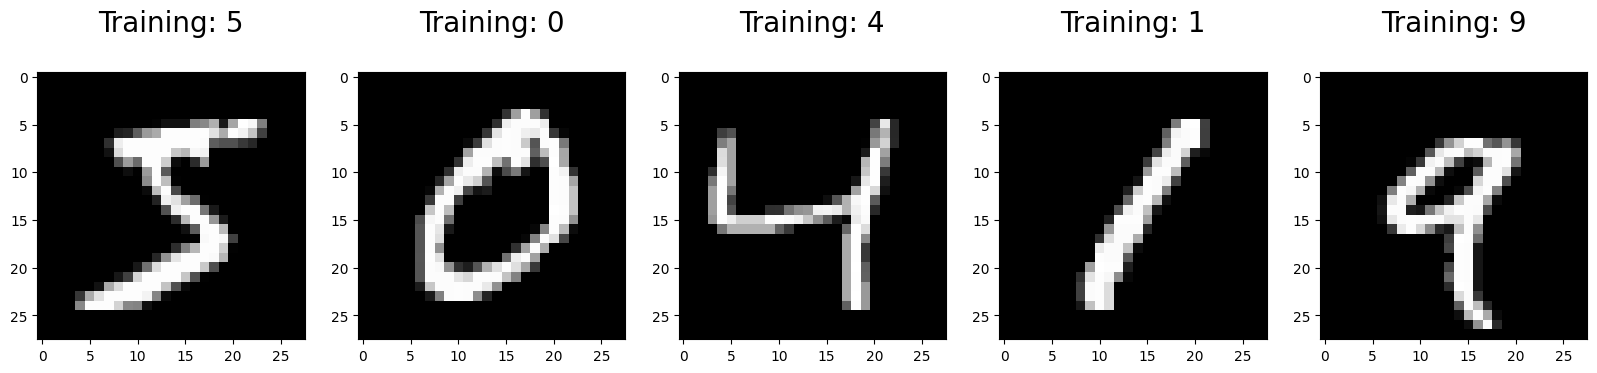

In [ ]:
# JUST RUN THIS CELL
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
np.random.seed(42)

mnist = fetch_openml('mnist_784')

X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X = X[:2000]
y = y[:2000]

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

N_COMPONENTS = [1,3,5,10,15,20,30,40,50,60]

In [ ]:
for n in N_COMPONENTS:
  X_train, X_test, y_train, y_test = train_test_split(
      x, y, test_size=0.3, random_state=42
  )

  sc = StandardScaler()
  sc.fit(X_train)

  pca = PCA(n_components=n)
  x_train = pca.fit_transform(X_train)
  x_test = pca.transform(X_test)

  lr = LogisticRegression(max_iter=500)

  lr.fit(x_train, y_train)
  p = lr.predict(x_test)

  acc = accuracy_score(y_test, p)

  print(n, acc)

1 0.2833333333333333


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 0.4533333333333333


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 0.665


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 0.8016666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15 0.8416666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


20 0.8466666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


30 0.8433333333333334


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


40 0.8316666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


50 0.8133333333333334
60 0.7916666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Задание 8**

Использование реализации алгоритма K-Means из sklearn для кластеризации

           a0        a1  class
0   -0.100000  0.500000      0
1   -0.100126  0.510052      0
2   -0.100505  0.520098      0
3   -0.101136  0.530131      0
4   -0.102020  0.540145      0
..        ...       ...    ...
995 -0.400789  0.487467      3
996 -0.400505  0.489964      3
997 -0.400284  0.492467      3
998 -0.400126  0.494976      3
999 -0.400032  0.497487      3

[1000 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-0.003011919294390726

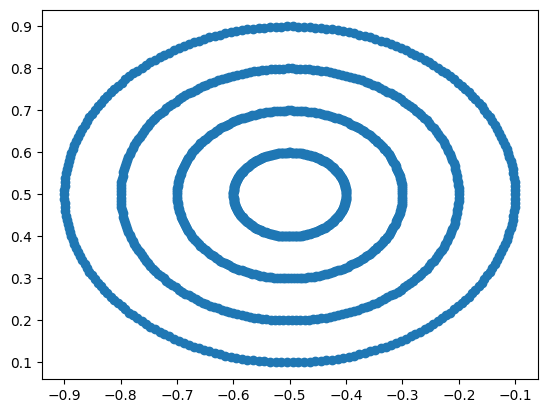

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

np.random.seed(42)

a = pd.read_csv('5.csv')
print(a)
a = np.array(a)
x = a[:,0]
y = a[:,1]
true = a[:,2]
a0 = np.vstack([x, y])
a0 = a0.T
plt.scatter(x, y)
kmeans = KMeans(n_clusters=4, random_state=42).fit(a0)
adjusted_rand_score(true,kmeans.labels_)

Алгоритм K-Средних

1.0

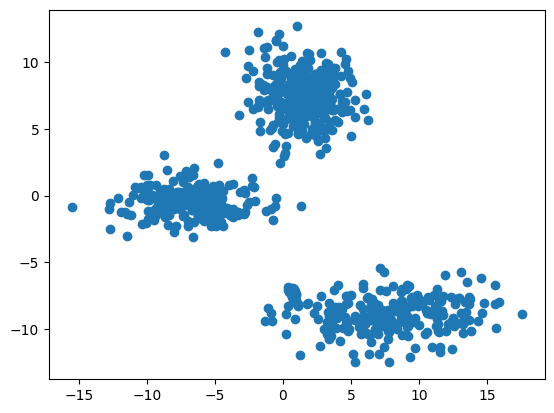

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def evkl(x,y):
  square = np.square(x - y)
  sum_square = np.sum(square)
  distance = np.sqrt(sum_square)
  return distance

class KMeans(object):
  def __init__(self, K, init):
    self.K = K
    self.init = np.array(init)

  def fit(self, X):
    X = np.array(X)
    n = X.shape[0]
    m = self.init.shape[1]
    min = 0
    ans = 0
    klas = 0
    mas = 1
    cent = [0.]*self.K
    for i in range(self.K):
      cent[i] = [0.]*m
    cent = np.array(cent)

    while mas >= 0.001:
      l = [0.]*self.K
      for i in range(self.K):
        l[i] = [0.]*m
      l = np.array(l)
      count = [0]*self.K
      for i in range(self.K):
        for j in range(m):
          cent[i][j] = self.init[i][j]
      for i in range(n):
        min = 0
        ans = 0
        for j in range(self.K):
          min = evkl(X[i,:],cent[j,:])
          if ans == 0 or min < ans:
            ans = min
            klas = j
        l[klas,:] += X[i,:]
        count[klas] += 1
      for j in range(self.K):
        self.init[j,:] = l[j,:]/count[j]
      for j in range(self.K-1):
        mas = max(evkl(self.init[j,:],cent[j,:]),evkl(self.init[j+1,:],cent[j+1,:]))

  def predict(self, X):
    n = X.shape[0]
    m = self.init.shape[1]
    min = 0
    ans = 0
    result = [0]*n
    for i in range(n):
      min = 0
      ans = 0
      for j in range(self.K):
        min = evkl(X[i,:],self.init[j,:])
        if ans == 0 or min < ans:
          ans = min
          result[i] = j
    result = np.array(result)
    return result

a = pd.read_csv('4.csv')
a = np.array(a)
x = a[:,1]
y = a[:,2]
true = a[:,3]
a0 = np.vstack([x, y])
a0 = a0.T
plt.scatter(x, y)
k_m = KMeans(3,[[0,0],[0,1],[1,0]])
k_m.fit(a0)
p = k_m.predict(a0)
adjusted_rand_score(true,p)

**Задание 9**

Система оценки схожести пользователей и объектов

In [ ]:
import numpy as np
from numpy.linalg import svd
from sklearn.neighbors import NearestNeighbors

class similaryty_analizer(object):
  def __init__(self, R: np.array):
    self.R = R
    self.n_users = 0
    self.n_items = 0

  def _get_svd(self, new_dim: int):
    R = self.R
    U, S, V = svd(R)

    U = U[0:new_dim+1,0:new_dim+1]
    S = np.diag(S[0:new_dim+1])
    V = V[0:new_dim+1,0:new_dim+1]

    P = np.matmul(U, S)
    Q = V

    return P, Q

  def get_similar_users(self, n_users: int, user_id: int):
    self.n_users = n_users
    P, Q = self._get_svd(self.n_users)

    nn = NearestNeighbors(n_neighbors=n_users+1)
    nn = nn.fit(P)

    user = P[user_id, :]
    neighbours = nn.kneighbors([user], n_neighbors=n_users+1, return_distance=False)[:, 0:].ravel()
    return np.array(neighbours[1:])

  def get_similar_items(self, n_items: int, item_id: int):
    self.n_items = n_items
    P, Q = self._get_svd(self.n_items)

    nn = NearestNeighbors(n_neighbors=n_items+1)
    nn = nn.fit(Q)

    item = Q[item_id, :]
    neighbours = nn.kneighbors([item], return_distance=False)[:, 0:].ravel()
    return np.array(neighbours[1:])

r1 = [1, 0, 0]
r2 = [1, 1, 0]
r3 = [1, 1, 1]

R = np.array([r1, r2, r3])
print(R)

SA = similaryty_analizer(R)
print(SA.get_similar_users(1, 0))

print(SA.get_similar_users(2, 0))

print(SA.get_similar_users(2, 1))

[[1 0 0]
 [1 1 0]
 [1 1 1]]
[1]
[1 2]
[0 2]


Социальная сеть "Друзья"

In [ ]:
import numpy as np

class friendadviser(object):
  def fit(self, R: np.array):
    self.R = R
    self.n_users = R.shape[0]
    self.n_items = R.shape[1]

  def _sim(self, u1: np.array, u2: np.array):
    nxy = 0.
    nx = 0.
    ny = 0.
    for i in range(self.n_items):
      if u1[i] == 1 and u2[i] == 1:
        nxy += 1
      if u1[i] == 1:
        nx += 1
      if u2[i] == 1:
        ny += 1
    score = nxy/(nx*ny)
    return score


  def U_idx(self, u0: np.array, alpha: float):
    u = []
    for i in range(self.n_users):
      if self._sim(u0, self.R[i,:]) >= alpha:
        u.append(i)
    return np.array(u)

  def find_friends(self, u0: np.array, how_many: int):
    u = []
    a = []
    for i in range(self.n_users):
      a.append(self._sim(u0, self.R[i,:]))
      u.append(i)
    for i in range(self.n_users-1):
      for j in range(self.n_users-i-1):
        if a[j] < a[j+1]:
            a[j], a[j+1] = a[j+1], a[j]
            u[j], u[j+1] = u[j+1], u[j]
    return np.array(u[0:how_many])

r1 = [1, 0, 0]
r2 = [1, 1, 0]
r3 = [1, 1, 1]

R = np.array([r1, r2, r3])
print(R)

F = friendadviser()
F.fit(R)

print(F.U_idx(R[0,:], 0.9))

print(F.U_idx(R[0,:], 1))

[[1 0 0]
 [1 1 0]
 [1 1 1]]
[0]
[0]
